<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 9: Filterung
## Synthetischer Brockenpluton: de-trend gridded data
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

We use a synthetic data set of the **Brocken pluton** for testing our filter algorithms.
<img src="figures/brockenpluton.jpg" style=width:10cm>

Our tasks are:
- create irregular synthetic data, add random noise, add linear trend
- create gridd data from irregular data
- detrend data (least squares fit)
- upward continuation of data (FFT)
- spatial derivatives of data (FFT)
- ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import lib_modelling
tiny=1e-15

In [2]:
lib_modelling.change_fontsize(SMALL_SIZE=12)

----
We first **load** gridded data created in the last notebook...

In [3]:
infile = 'Brocken_gridded.npy'
data = np.load(infile)    
print(data.shape)
X = data[0,:,:]
Y = data[1,:,:]
boug = data[2,:,:]

(3, 100, 100)


In [4]:
xmin = X.min()
xmax = X.max()
ymin = Y.min()
ymax = Y.max()

----
## Detrend data set

From the gridded data $\Delta g_B^i$ we try to fit a linear plane:
$$
plane(x,y,*a) = a_0 + a_1 x + a_2 y
$$, 
thus we want to find the best set of coefficients $a_i$.

In [5]:
def plane(x,y,*a):
    plane = a[0] + a[1]*x + a[2]*y
    return plane

def residual(a,x,y,boug):
    res = a[0] + a[1]*x + a[2]*y - boug
    return res

In [6]:
coeff = scipy.optimize.least_squares(residual, [10,1e-4,1e-4], 
                                     args=(X.flatten(),Y.flatten(),boug.flatten()), 
                                     loss='cauchy')

In [7]:
print(coeff)

 active_mask: array([0., 0., 0.])
        cost: 16255.346741131729
         fun: array([4.22165493, 4.22785654, 4.4305615 , ..., 5.86632081, 5.35144023,
       5.55414519])
        grad: array([ 8.17047514e-02, -6.46486435e+02,  3.62161762e+03])
         jac: array([[ 1.49011612e-08, -7.45058060e-04, -7.45058060e-04],
       [ 1.49011612e-08, -7.30006382e-04, -7.45058060e-04],
       [ 1.49011612e-08, -7.14954704e-04, -7.45058060e-04],
       ...,
       [ 1.49011612e-08,  7.14954704e-04,  7.45058060e-04],
       [ 1.49011612e-08,  7.30006382e-04,  7.45058060e-04],
       [ 1.49011612e-08,  7.45058060e-04,  7.45058060e-04]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 40
        njev: 33
  optimality: 3621.6176216692547
      status: 2
     success: True
           x: array([2.76553458e+01, 2.00677906e-04, 1.94721530e-04])


In [8]:
detrend = plane(X,Y,coeff.x[0],coeff.x[1],coeff.x[2])
print(detrend.shape)

(100, 100)


Text(0.5, 0, 'Gravity [mGal]')

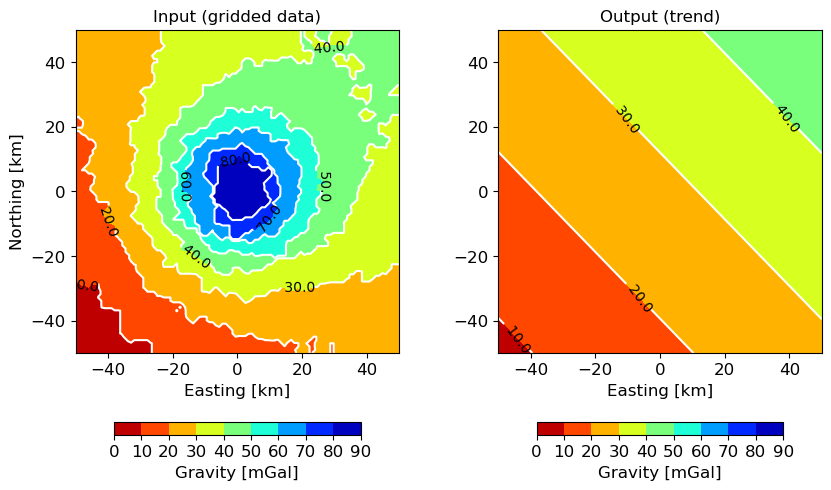

In [9]:
fig,axs = plt.subplots(1,2,figsize=(10.0,6.0))
color_levels=[0,10,20,30,40,50,60,70,80,90]

axs[0].set_aspect('equal')
axs[0].set_title('Input (gridded data)')
axs[0].set_xlabel('Easting [km]')
axs[0].set_ylabel('Northing [km]')
axs[0].set_xlim([xmin/1e3,xmax/1e3])
axs[0].set_ylim([ymin/1e3,ymax/1e3])
CS1=axs[0].contourf(X/1.e3,Y/1.e3,boug,cmap=plt.cm.jet_r,levels=color_levels)
CS2=axs[0].contour(X/1.e3,Y/1e3,boug,colors='white',levels=color_levels)
axs[0].clabel(CS2, inline=1, fontsize=10,fmt='%5.1f',colors='black')
cbar = fig.colorbar(CS1,ax=axs[0],orientation="horizontal",shrink=0.7)
cbar.ax.set_xlabel('Gravity [mGal]')

axs[1].set_aspect('equal')
axs[1].set_title('Output (trend)')
axs[1].set_xlabel('Easting [km]')
#axs[1].set_ylabel('Northing [km]')
CS1=axs[1].contourf(X/1.e3,Y/1.e3,detrend,cmap=plt.cm.jet_r,levels=color_levels)
CS2=axs[1].contour(X/1.e3,Y/1.e3,detrend,colors='white',levels=color_levels)
axs[1].clabel(CS2, inline=1, fontsize=10,fmt='%5.1f',colors='black')
cbar = fig.colorbar(CS1,ax=axs[1],orientation="horizontal",shrink=0.7)
cbar.ax.set_xlabel('Gravity [mGal]')

In [10]:
boug_detrend = boug - detrend

Text(0.5, 0, 'Gravity [mGal]')

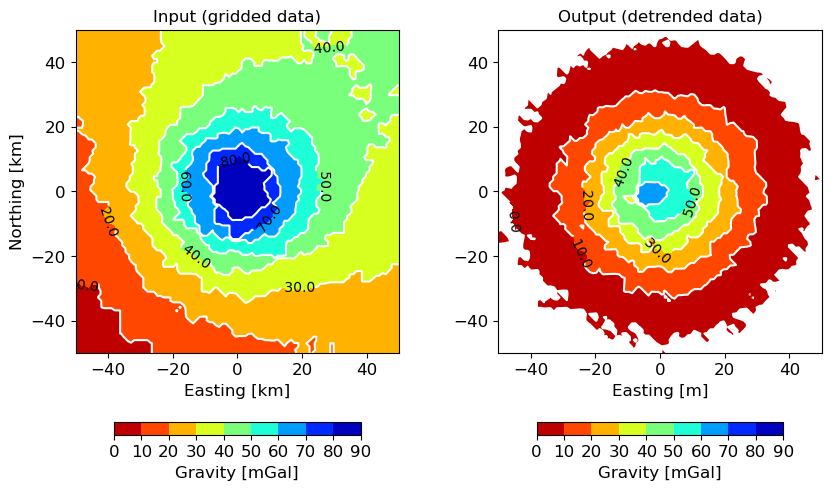

In [11]:
fig,axs = plt.subplots(1,2,figsize=(10.0,6.0))
color_levels=[0,10,20,30,40,50,60,70,80,90]

axs[0].set_aspect('equal')
axs[0].set_title('Input (gridded data)')
axs[0].set_xlabel('Easting [km]')
axs[0].set_ylabel('Northing [km]')
axs[0].set_xlim([xmin/1e3,xmax/1e3])
axs[0].set_ylim([ymin/1e3,ymax/1e3])
CS1=axs[0].contourf(X/1.e3,Y/1.e3,boug,cmap=plt.cm.jet_r,levels=color_levels)
CS2=axs[0].contour(X/1.e3,Y/1e3,boug,colors='white',levels=color_levels)
axs[0].clabel(CS2, inline=1, fontsize=10,fmt='%5.1f',colors='black')
cbar = fig.colorbar(CS1,ax=axs[0],orientation="horizontal",shrink=0.7)
cbar.ax.set_xlabel('Gravity [mGal]')

axs[1].set_aspect('equal')
axs[1].set_title('Output (detrended data)')
axs[1].set_xlabel('Easting [m]')
#axs[1].set_ylabel('Northing [m]')
CS1=axs[1].contourf(X/1.e3,Y/1.e3,boug_detrend,cmap=plt.cm.jet_r,levels=color_levels)
CS2=axs[1].contour(X/1.e3,Y/1.e3,boug_detrend,colors='white',levels=color_levels)
axs[1].clabel(CS2, inline=1, fontsize=10,fmt='%5.1f',colors='black')
cbar = fig.colorbar(CS1,ax=axs[1],orientation="horizontal",shrink=0.7)
cbar.ax.set_xlabel('Gravity [mGal]')

----
## Save data to file

In [12]:
# save to file
outfile =  'Brocken_detrended.npy'
np.save(outfile,[X,Y,boug_detrend])

[next>](AGII_chap09_Brocken_FFTupward.ipynb)

----